In [1]:
from tree_sitter_api  import Parser
from tree_sitter_java import tree_sitter_java

In [2]:
parser = Parser()
parser.set_language(tree_sitter_java())

True

In [3]:
source_code = "public class Main {}"

In [4]:
tree = parser.parse_string(source_code)

In [5]:
root = tree.root_node()

In [6]:
root.end_byte()

20

In [7]:
root.string()

'(program (class_declaration (modifier) (identifier) (class_body)))'

In [8]:
class_decl = root[0]

In [9]:
class_decl.string()

'(class_declaration (modifier) (identifier) (class_body))'

In [10]:
class_decl.start_byte()

0

In [11]:
mod = class_decl[0]

In [12]:
mod.string()

'(modifier)'

In [13]:
mod.start_byte()

0

In [14]:
mod.end_byte()

6

In [15]:
ident = class_decl[1]

In [16]:
ident.start_byte()

7

In [17]:
source_code

'public class Main {}'

In [18]:
new_source = "public class Main {\n\tprivate int num;\n}"

In [19]:
from tree_sitter_api import InputEdit
from tree_sitter_api import Point

In [20]:
edit = InputEdit()
edit.start_point = Point()
edit.new_end_point = Point()
edit.old_end_point = Point()

In [21]:
edit.start_byte = 18
edit.start_point.row = 0
edit.start_point.column = 18
edit.new_end_byte = 38
edit.new_end_point.row = 2
edit.new_end_point.column = 0
edit.old_end_byte = 19
edit.old_end_point.row = 0
edit.old_end_point.column = 19

In [22]:
tree.print_dot_graph("/home/bugs/graph")

In [23]:
from graphviz import Source

In [24]:
def show_graph(tree):
    tree.print_dot_graph("/tmp/graph")
    f = open("/tmp/graph", "r")
    s = Source(f.read())
    f.close()
    return s

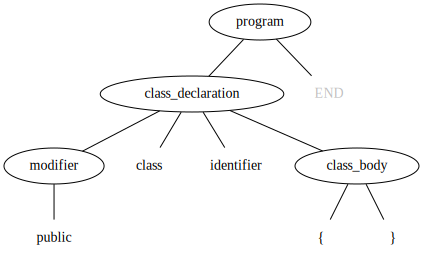

In [25]:
show_graph(tree)

In [26]:
tree.edit(edit)
str(tree._tree_ptr)

"<tree_sitter_api.tree_sitter_api.p_TSTree; proxy of <Swig Object of type 'p_TSTree *' at 0x7fc2a85269f0> >"

In [27]:
new_tree = parser.parse_string(new_source, tree)

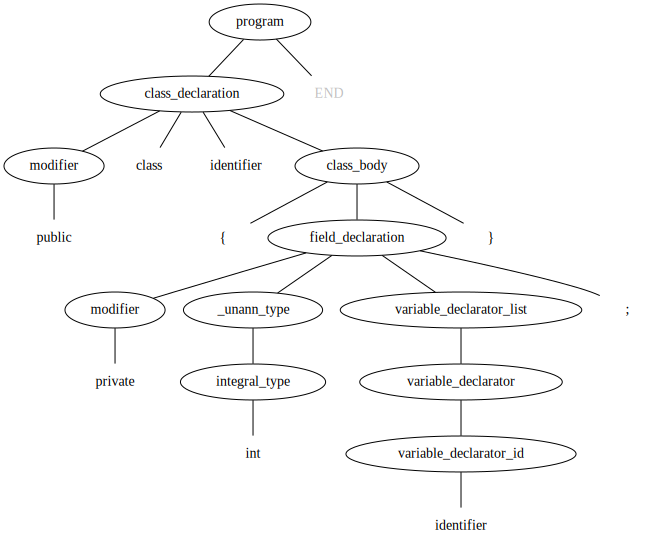

In [28]:
show_graph(new_tree)